In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# I. Expériences de prédiction de cancer de la poitrine

In [60]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer['data'].shape)

X = cancer['data']
y = cancer['target']


(569, 30)


## Découpage du jeu de données

In [61]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y)

# jeu de données bien découpé
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(426, 30) (143, 30) (426,) (143,)


## Prétraitement : normalisation

In [62]:
from sklearn.preprocessing import StandardScaler

# print to see if standardisation worked
print("avant standardisation : ")
print("moyenne : {} , \t écart-type : {} \n".format(np.mean(X_train[:,1], axis=0),np.std(X_train[:,1],axis=0)))

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# same as before
print("après standardisation : ")
print("moyenne : {} , \t écart-type : {} ".format(np.mean(X_train[:,1], axis=0),np.std(X_train[:,1],axis=0)))


avant standardisation : 
moyenne : 19.020140845070426 , 	 écart-type : 4.146755616115698 

après standardisation : 
moyenne : 4.353325212051318e-15 , 	 écart-type : 0.9999999999999994 


## Premier modèle

In [63]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10))
mlp.fit(X_train, y_train)

/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10, 10))

## Evaluation du modèle

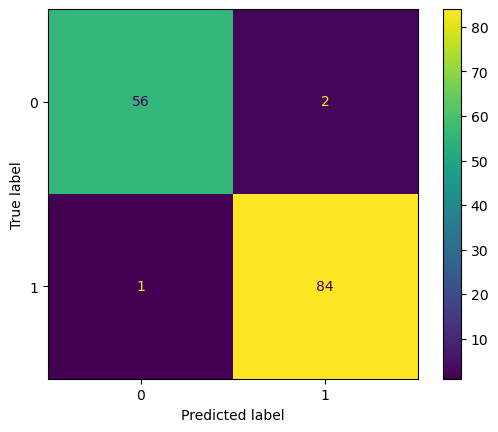

<Figure size 640x480 with 0 Axes>

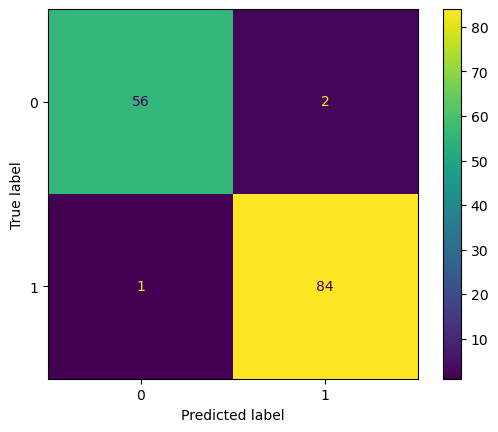

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        58
           1       0.98      0.99      0.98        85

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [70]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

pred = mlp.predict(X_test)
conf_maxtrix = ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.figure()
conf_maxtrix.plot()
plt.show()
print(classification_report(y_test,  pred))

## Ajustement des hyper-paramètres (profondeur et taille de couche)

In [ ]:
(10)*3

In [85]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier()
parameters = {'hidden_layer_sizes':[(10*i,10*i,10*i) for i in range(1,4)]}
mod = GridSearchCV(mlp,param_grid=parameters)

mod.fit(X_train,y_train)
print(mod.best_params_)

/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Opti

{'hidden_layer_sizes': (10, 10, 10)}


/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# II. Reconnaissance de chiffres manuscrits

[]

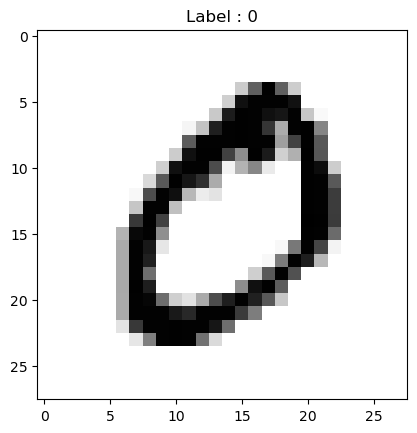

In [30]:

## if local file mnist-original.mat exist
'''
from scipy.io import loadmat

mnist = loadmat('mnist-original.mat')
mnist = mnist['data'].transpose()
plt.imshow(mnist[1,:].reshape((28,28)))
'''

#otherwise download from 
from sklearn.datasets import fetch_openml

#X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
plt.imshow(X[1,:].reshape(28,28),cmap=matplotlib.cm.binary)
plt.title("Label : {}".format(y[1]))
plt.plot()

## Découpage du jeu de données

In [31]:
X_train, y_train, X_test, y_test = X[:60000],y[:60000],X[60000:],y[60000:]

shuffle_index = np.random.permutation(60000)

X_train , y_train = X_train[shuffle_index], y_train[shuffle_index] 

## Pré-traitement : construction one-fit all

In [32]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test==5)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[13890  7339 11021 ... 16269 37337   933]


## Premier modèle : perceptron multicouche (20,20)

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *

mlp = MLPClassifier(hidden_layer_sizes=(20,20))
mlp.fit(X_train, y_train_5)

pred = mlp.predict(X_test)
print(confusion_matrix(y_test_5,pred))

[[10000]]


/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array(['7', '3', '3', ..., '2', '1', '7'], dtype=object)